In [2]:
#//*** GEOPANDAS sources
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
#https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
#https://geopandas.org/docs/user_guide/mapping.html

#//*** Build Custom Color Gradients
#https://coolors.co/gradient-palette/ffffff-e0472b?number=9

#//*** pandas_bokeh
#//*** https://pythonawesome.com/bokeh-plotting-backend-for-pandas-and-geopandas/

In [3]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import time 
import random


import geopandas as gpd
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

pd.set_option('display.width', 200)

#df_list = []

#from sklearn import linear_model
#from math import sqrt
#from sklearn.metrics import mean_squared_error

In [4]:
#"https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

In [5]:
#//*** Only download Data if download_data is True.
#//*** Avoids needlessly generating HTTP traffic
download_data = False
confirmed_data_filename = "z_us_confirmed.csv"
cases_data_filename = "z_ca_covid_cases.csv"

#//***********************************************************************************************
#//*** California COVID Data website:
#//**************************************
#//*** https://data.chhs.ca.gov/dataset/covid-19-time-series-metrics-by-county-and-state
#//***********************************************************************************************

#//*** Download California Current COVID Demograohic Data
if download_data:
    try:
        response = requests.get("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
        if response.ok:
            print("US Confirmed Data Downloaded")
            f = open(confirmed_data_filename, "w")
            f.write(response.text)
            f.close()
            print("US Confirmed Data Written to file.")
    except:
        print("US Confirmed Data: Trouble Downloading From Johns Hopkins Github")

#confirm_df = pd.read_csv(confirmed_data_filename, dtype={"FIPS":np.int32})


In [6]:
confirm_df = pd.read_csv(confirmed_data_filename)
confirm_df = confirm_df.dropna(subset=["FIPS"])


#//*** Rename Columns to sync dataframes by FIPS/GEOID

ren_cols = {
    "FIPS" : "GEOID"
}

#//*** Get columns
cols = np.array(confirm_df.columns)

#//*** Rplace Values
for find_col,replace_col in ren_cols.items():
    cols = np.where(cols == find_col,replace_col,cols)

#//*** update columns
confirm_df.columns = cols

confirm_df["GEOID"] = confirm_df["GEOID"].astype(np.int)

#//*** Remove Territories
confirm_df = confirm_df[confirm_df['iso3'] == 'USA']

#//*** Get Shape File
states = gpd.read_file('maps\cb_2018_us_county_20m.shp')

#//*** Keep the important Columns
states = states[['STATEFP','GEOID','NAME','geometry']]


states['GEOID'] = states['GEOID'].astype(int)

#//*** Merge 
confirm_df = states.merge(confirm_df,left_on="GEOID",right_on="GEOID")

#//*** Remove Extra Columns
rem_cols = ['iso2','iso3','code3',"Admin2","Country_Region","Lat","Long_","UID"]

cols = list(confirm_df.columns)

for col in rem_cols:
    cols.remove(col)

confirm_df = confirm_df[cols]


#//*** Generate Daily new Cases
#//*** Diff
confirm_df[confirm_df.columns[6:]] = confirm_df[confirm_df.columns[6:]].diff(axis = 1, periods = 1)

confirm_df



STATEFP  GEOID      NAME                                           geometry  Province_State                Combined_Key  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0         37  37017    Bladen  POLYGON ((-78.90200 34.83527, -78.79960 34.850...  North Carolina  Bladen, North Carolina, US      NaN        0        0        0        0        0        0        0   
1         37  37167    Stanly  POLYGON ((-80.49737 35.20210, -80.29542 35.502...  North Carolina  Stanly, North Carolina, US      NaN        0        0        0        0        0        0        0   
2         39  39153    Summit  POLYGON ((-81.68699 41.13596, -81.68495 41.277...            Ohio            Summit, Ohio, US      NaN        0        0        0        0        0        0        0   
3         42  42113  Sullivan  POLYGON ((-76.81373 41.59003, -76.22014 41.541...    Pennsylvania  Sullivan, Pennsylvania, US      NaN        0        0        0        0        0        0        0   
4         48  48459    Upshur  POLYGON ((-95.15274 32.66095, -95.15211 32.902...           Texas           Upshur, Texas, US      NaN        0        0        0        0        0        0        0   
...      ...    ...       ...                                                ...             ...                         ...      ...      ...      ...      ...      ...      ...      ...      ...   
3137      22  22003     Allen  POLYGON ((-93.13029 30.59789, -92.97917 30.598...       Louisiana        Allen, Louisiana, US      NaN        0        0        0        0        0        0        0   
3138      38  38005    Benson  POLYGON ((-99.84661 48.37130, -99.49292 48.370...    North Dakota    Benson, North Dakota, US      NaN        0        0        0        0        0        0        0   
3139      31  31159    Seward  POLYGON ((-97.36812 41.04695, -96.91094 41.046...        Nebraska        Seward, Nebraska, US      NaN        0        0        0        0        0        0        0   
3140      37  37023     Burke  POLYGON ((-81.90665 35.88338, -81.94319 35.960...  North Carolina   Burke, North Carolina, US      NaN        0        0        0        0        0        0        0   
3141      13  13261    Sumter  POLYGON ((-84.43301 32.04196, -84.43121 32.134...         Georgia         Sumter, Georgia, US      NaN        0        0        0        0        0        0        0   

      1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  \
0           0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
1           0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
2           0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
3           0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
4           0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
...       ...      ...     ...     ...     ...     ...     ...     ...     ...     ...     ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...      ...   
3137        0        0       0       0       0       0       0       0       0       0       0        0        0        0        0        0        0        0        0        0        0        0   
3138        0        0      

In [7]:

#//*** Get Most Current Day
cols = list(confirm_df.columns[:6])
cols.append( confirm_df.columns[-1])
confirm_df = confirm_df[cols]
confirm_df[confirm_df["Province_State"]=="Alabama"]
#confirm_df[ ( list(confirm_df.columns[:7])+ list(confirm_df.columns[-1]) )]

STATEFP  GEOID        NAME                                           geometry Province_State             Combined_Key  9/17/21
7         01   1043     Cullman  POLYGON ((-87.11199 33.99238, -87.10991 34.299...        Alabama     Cullman, Alabama, US       50
15        01   1059    Franklin  POLYGON ((-88.15490 34.46303, -88.13956 34.581...        Alabama    Franklin, Alabama, US       12
33        01   1023     Choctaw  POLYGON ((-88.46866 31.89386, -88.46866 31.933...        Alabama     Choctaw, Alabama, US        3
57        01   1109        Pike  POLYGON ((-86.19138 31.96645, -85.99556 31.967...        Alabama        Pike, Alabama, US       68
66        01   1075       Lamar  POLYGON ((-88.25444 33.69878, -88.24839 33.744...        Alabama       Lamar, Alabama, US        8
75        01   1073   Jefferson  POLYGON ((-87.26692 33.51293, -87.27159 33.529...        Alabama   Jefferson, Alabama, US      284
82        01   1079    Lawrence  POLYGON ((-87.52967 34.56708, -87.44501 34.652...        Alabama    Lawrence, Alabama, US       22
108       01   1017    Chambers  POLYGON ((-85.59318 33.10734, -85.23244 33.108...        Alabama    Chambers, Alabama, US       29
170       01   1053    Escambia  POLYGON ((-87.61589 31.24446, -87.55929 31.227...        Alabama    Escambia, Alabama, US       43
353       01   1057     Fayette  POLYGON ((-87.95179 33.91993, -87.73935 33.914...        Alabama     Fayette, Alabama, US        9
444       01   1045        Dale  POLYGON ((-85.78914 31.61796, -85.74825 31.618...        Alabama        Dale, Alabama, US       37
465       01   1083   Limestone  POLYGON ((-87.27830 34.77356, -87.21491 34.816...        Alabama   Limestone, Alabama, US       73
478       01   1001     Autauga  POLYGON ((-86.91759 32.66417, -86.71339 32.661...        Alabama     Autauga, Alabama, US       23
574       01   1037       Coosa  POLYGON ((-86.51734 33.02057, -86.51114 33.088...        Alabama       Coosa, Alabama, US       10
604       01   1007        Bibb  POLYGON ((-87.42194 33.00338, -87.31854 33.006...        Alabama        Bibb, Alabama, US       18
653       01   1131      Wilcox  POLYGON ((-87.66777 31.99135, -87.62276 32.005...        Alabama      Wilcox, Alabama, US        4
655       01   1119      Sumter  POLYGON ((-88.38925 32.57812, -88.37334 32.711...        Alabama      Sumter, Alabama, US        2
751       01   1087       Macon  POLYGON ((-86.02301 32.41998, -85.85262 32.475...        Alabama       Macon, Alabama, US        7
782       01   1089     Madison  POLYGON ((-86.78363 34.99192, -86.46780 34.990...        Alabama     Madison, Alabama, US      222
826       01   1027        Clay  POLYGON ((-86.17283 33.19568, -86.12057 33.194...        Alabama        Clay, Alabama, US        5
941       01   1047      Dallas  POLYGON ((-87.47308 32.30761, -87.42174 32.308...        Alabama      Dallas, Alabama, US       15
1115      01   1009      Blount  POLYGON ((-86.96336 33.85822, -86.92439 33.909...        Alabama      Blount, Alabama, US       28
1254      01   1121   Talladega  POLYGON ((-86.50313 33.17914, -86.45803 33.241...        Alabama   Talladega, Alabama, US       72
1312      01   1111    Randolph  POLYGON ((-85.64113 33.32050, -85.64348 33.495...        Alabama    Randolph, Alabama, US       16
1324      01   1031      Coffee  POLYGON ((-86.19395 31.44007, -86.19478 31.529...        Alabama      Coffee, Alabama, US       27
1325      01   1025      Clarke  POLYGON ((-88.12141 31.95026, -88.07349 31.990...        Alabama      Clarke, Alabama, US       16
1386      01   1055      Etowah  POLYGON ((-86.33239 34.04050, -86.30352 34.099...        Alabama      Etowah, Alabama, US       59
1392      01   1015     Calhoun  POLYGON ((-86.14556 33.67910, -86.04399 33.763...        Alabama     Calhoun, Alabama, US      118
1393      01   1041    Crenshaw  POLYGON ((-86.49953 31.65525, -86.44863 31.655...        Alabama    Crenshaw, Alabama, US       22
1491      01   1035     Conecuh  POLYGON ((-8

In [8]:
#https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-agesex-01.csv
#https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/cc-est2019-agesex-56.csv
#//*** Scrape Census Population Data
"""
for x in range(1,57):
    x = str(x)
    if len(x) < 2:
        x = f"0{x}"
    filename = f"cc-est2019-agesex-{x}.csv"
    url = f"https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/asrh/{filename}"
    print(url)
    try:
        response = requests.get(url)
        if response.ok:
            print(f"Downloaded: {filename}")
            f = open(f"./demo_data/{filename}", "w")
            f.write(response.text)
            f.close()
            print(f"Written: {filename}")

    except:
        print(f"Error: {filename}")
    time.sleep(1)

print()
"""
pop_df = pd.DataFrame()

#//*** Get population Totals from each county

for x in range(1,57):
    x = str(x)
    if len(x) < 2:
        x = f"0{x}"
    filename = f"./demo_data/cc-est2019-agesex-{x}.csv"
    
    try:
        tdf = pd.read_csv(filename)
    except:
        continue
    
    #//*** Only keep the last year
    tdf = tdf[tdf['YEAR']==12]
    
    #//*** Reformat County name to match confirmed County Name
    tdf['CTYNAME'] = tdf['CTYNAME'].str.replace(" County","")

    #//*** Remove uneccesary columns
    tdf = tdf[["STNAME","CTYNAME","POPESTIMATE"]]
    
    #//*** Merge with confirmed on county names to get Dataframe with GEOID and Population estimate
    tdf = confirm_df[confirm_df["Province_State"]==tdf["STNAME"].unique()[0]][["GEOID","NAME"]].merge(tdf,left_on="NAME",right_on="CTYNAME")
    
    for col in ["NAME"]:
        if col in tdf.columns:
            del tdf[col]
    
    pop_df = pd.concat([pop_df,tdf],axis=0)

    
    
pop_df


GEOID   STNAME   CTYNAME  POPESTIMATE
0    1043  Alabama   Cullman        83768
1    1059  Alabama  Franklin        31362
2    1023  Alabama   Choctaw        12589
3    1109  Alabama      Pike        33114
4    1075  Alabama     Lamar        13805
..    ...      ...       ...          ...
18  56035  Wyoming  Sublette         9831
19  56023  Wyoming   Lincoln        19830
20  56007  Wyoming    Carbon        14800
21  56015  Wyoming    Goshen        13211
22  56043  Wyoming  Washakie         7805

[3014 rows x 4 columns]

In [9]:
confirm_df = confirm_df.merge(pop_df,left_on="GEOID",right_on="GEOID")

In [10]:
ca_df = confirm_df[confirm_df['STNAME'] == "Nevada"].copy()
ca_df = confirm_df[confirm_df['STNAME'] != "Hawaii"].copy()
ca_df['POPESTIMATE'] = ca_df['POPESTIMATE'] / 100000
ca_df['100k'] = ca_df["9/17/21"] / ca_df['POPESTIMATE']
ca_df.sort_values("CTYNAME")

ca_df['STNAME'].unique()

array(['North Carolina', 'Ohio', 'Pennsylvania', 'Texas',
       'South Carolina', 'Alabama', 'West Virginia', 'South Dakota',
       'Wisconsin', 'Indiana', 'Iowa', 'Kansas', 'Nebraska', 'Missouri',
       'New Mexico', 'Virginia', 'Michigan', 'Minnesota', 'Oklahoma',
       'Florida', 'New York', 'North Dakota', 'Arkansas', 'Georgia',
       'Illinois', 'Maryland', 'Kentucky', 'Mississippi', 'Colorado',
       'Washington', 'Tennessee', 'Idaho', 'Wyoming', 'Montana', 'Utah',
       'Arizona', 'California', 'Oregon', 'Vermont', 'Nevada',
       'New Jersey', 'District of Columbia', 'Maine', 'Rhode Island',
       'Massachusetts', 'New Hampshire', 'Connecticut', 'Delaware'],
      dtype=object)

In [21]:
states
display_size=200
vmin=0
vmax=100
fig, ax = plt.subplots(1, figsize=(display_size, display_size))

ax.axis('off')
#ax.set_title(f"{race} Disparity (by County)",fontsize=display_size*.5)

# add the colorbar to the figure
#//*** The Colormaps are hand coded and stored in a dictionary
cmap =  ListedColormap( ["#FFFFFF","#FBE8E5","#F7D1CA","#F3BAB0","#F0A395","#EC8C7B","#E87560","#E45E46","#E0472B"])
cmap =  ListedColormap( ["#FFFFFF","#FDF5F4","#FCECE9","#FAE2DE","#F8D8D2","#F7CFC7","#F5C5BC","#F4BBB1","#F2B2A6","#F0A89B","#EF9E8F","#ED9484","#EB8B79","#EA816E","#E87763","#E76E58","#E5644C","#E35A41","#E25136","#E0472B"])


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []


cbar = fig.colorbar(sm,shrink=.3)

#ticklabs = cbar.ax.get_yticklabels()
#cbar.ax.set_yticklabels(ticklabs, fontsize=20)

cbar.ax.tick_params(labelsize=display_size)

plt.title(" COVID Prevalence",fontsize=display_size)
fig.text(.78, .2, 'New Cases (per 100k)', va='center' ,fontsize=display_size)
ca_df.plot(column='100k',cmap=cmap, ax=ax,linewidth=0.8,edgecolor='.8')

plt.show()

In [12]:
usa_df =  confirm_df[confirm_df['STNAME'] == "California"].copy()
usa_df['POPESTIMATE'] = usa_df['POPESTIMATE'] / 100000
usa_df['100k'] = usa_df["9/17/21"] / ca_df['POPESTIMATE']
usa_df

STATEFP  GEOID             NAME                                           geometry Province_State                     Combined_Key  9/17/21      STNAME          CTYNAME  POPESTIMATE       100k
175       06   6049            Modoc  POLYGON ((-121.45721 41.94994, -121.44754 41.9...     California            Modoc, California, US        0  California            Modoc      0.08841   0.000000
510       06   6055             Napa  POLYGON ((-122.62740 38.66751, -122.46389 38.7...     California             Napa, California, US       33  California             Napa      1.37744  23.957486
942       06   6099       Stanislaus  POLYGON ((-121.47192 37.48178, -121.24122 37.6...     California       Stanislaus, California, US      316  California       Stanislaus      5.50660  57.385683
945       06   6077      San Joaquin  POLYGON ((-121.58002 38.09441, -121.47214 38.2...     California      San Joaquin, California, US      328  California      San Joaquin      7.62148  43.036261
1008      06   6011           Colusa  POLYGON ((-122.78509 39.38297, -122.73906 39.3...     California           Colusa, California, US       11  California           Colusa      0.21547  51.051190
1055      06   6023         Humboldt  POLYGON ((-124.38702 40.50495, -124.30136 40.6...     California         Humboldt, California, US       55  California         Humboldt      1.35558  40.573039
1078      06   6105          Trinity  POLYGON ((-123.56016 40.95026, -123.48146 40.9...     California          Trinity, California, US        6  California          Trinity      0.12285  48.840049
1079      06   6029             Kern  POLYGON ((-120.19415 35.78920, -119.53812 35.7...     California             Kern, California, US      605  California             Kern      9.00202  67.207138
1128      06   6111          Ventura  MULTIPOLYGON (((-119.47795 34.37884, -119.4459...     California          Ventura, California, US      127  California          Ventura      8.46006  15.011714
1129      06   6003           Alpine  POLYGON ((-120.07248 38.50987, -120.07239 38.7...     California           Alpine, California, US        0  California           Alpine      0.01129   0.000000
1130      06   6001          Alameda  POLYGON ((-122.33371 37.80980, -122.30393 37.8...     California          Alameda, California, US      272  California          Alameda     16.71329  16.274474
1196      06   6093         Siskiyou  POLYGON ((-123.66020 41.71405, -123.70368 41.8...     California         Siskiyou, California, US       15  California         Siskiyou      0.43539  34.451871
1223      06   6115             Yuba  POLYGON ((-121.62376 39.29562, -121.40753 39.3...     California             Yuba, California, US       28  California             Yuba      0.78668  35.592617
1269      06   6037      Los Angeles  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...     California      Los Angeles, California, US     1710  California      Los Angeles    100.39107  17.033388
1270      06   6045        Mendocino  POLYGON ((-124.02521 40.00130, -123.54446 40.0...     California        Mendocino, California, US       49  California        Mendocino      0.86749  56.484801
1325      06   6039           Madera  POLYGON ((-120.47669 37.09639, -120.22729 37.1...     California           Madera, California, US       94  California           Madera      1.57327  59.748168
1407      06   6083    Santa Barbara  MULTIPOLYGON (((-119.91622 34.05835, -119.8573...     California    Santa Barbara, California, US      195  California    Santa Barbara      4.46499  43.673110
1466      06   6013     Contra Costa  POLYGON ((-122.42526 37.95567, -122.36758 37.9...     California     Contra Costa, California, US      224  California     Contra Costa     11.53526  19.418721
1490      06   6009        Calaveras  POLYGON ((-120.99550 38.22540, -120.89286 38.2...     California        Calaveras, California, US       20  California        Calaveras      0.45905  43.568239
1497      06   6019           Fresno  POLYGON

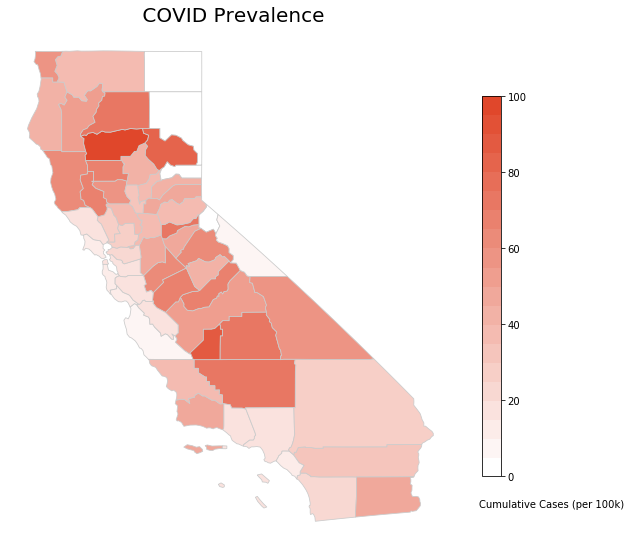

In [13]:
states
display_size=20
vmin=0
vmax=100
fig, ax = plt.subplots(1, figsize=(display_size/2, display_size/2))

ax.axis('off')
#ax.set_title(f"{race} Disparity (by County)",fontsize=display_size*.5)

# add the colorbar to the figure
#//*** The Colormaps are hand coded and stored in a dictionary
cmap =  ListedColormap( ["#FFFFFF","#FBE8E5","#F7D1CA","#F3BAB0","#F0A395","#EC8C7B","#E87560","#E45E46","#E0472B"])
cmap =  ListedColormap( ["#FFFFFF","#FDF5F4","#FCECE9","#FAE2DE","#F8D8D2","#F7CFC7","#F5C5BC","#F4BBB1","#F2B2A6","#F0A89B","#EF9E8F","#ED9484","#EB8B79","#EA816E","#E87763","#E76E58","#E5644C","#E35A41","#E25136","#E0472B"])


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []


cbar = fig.colorbar(sm,shrink=.7)

plt.title(" COVID Prevalence",fontsize=display_size)
fig.text(.78, .2, 'Cumulative Cases (per 100k)', va='center' ,fontsize=display_size/2)
usa_df.plot(column='100k',cmap=cmap, ax=ax,linewidth=0.8,edgecolor='.8')
#ca_df.plot()

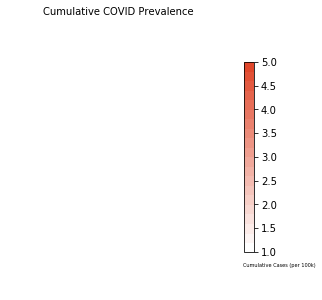

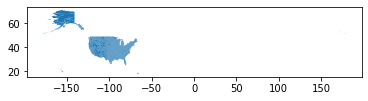

In [14]:
states
display_size=10
vmin=1
vmax=5
fig, ax = plt.subplots(1, figsize=(display_size/2, display_size/2))

ax.axis('off')
#ax.set_title(f"{race} Disparity (by County)",fontsize=display_size*.5)

# add the colorbar to the figure
#//*** The Colormaps are hand coded and stored in a dictionary
cmap =  ListedColormap( ["#FFFFFF","#FBE8E5","#F7D1CA","#F3BAB0","#F0A395","#EC8C7B","#E87560","#E45E46","#E0472B"])
cmap =  ListedColormap( ["#FFFFFF","#FDF5F4","#FCECE9","#FAE2DE","#F8D8D2","#F7CFC7","#F5C5BC","#F4BBB1","#F2B2A6","#F0A89B","#EF9E8F","#ED9484","#EB8B79","#EA816E","#E87763","#E76E58","#E5644C","#E35A41","#E25136","#E0472B"])


# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []


cbar = fig.colorbar(sm,shrink=.7)

plt.title("Cumulative COVID Prevalence",fontsize=display_size)
fig.text(.78, .2, 'Cumulative Cases (per 100k)', va='center' ,fontsize=display_size/2)
states.plot()